In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import os
#import sys
import warnings
warnings.filterwarnings('ignore')


In [70]:
#open the .txt file here in the csv format
df = pd.read_csv('KDDTrain+.txt',header=None)

#show all the columns
pd.set_option('display.max_columns', None)

#got from Kaggle NB
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']



In [71]:
print(df.shape)
df.head()

(125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### **Step-1:**
Here I want to modify the `outcome` variable in 2 different variables and 1 name chenge of variable i.e., 
1. Binary outcome: `class_label`  = 0 = normal and 1 = attack
2. Broad Attack division: `attack_class` = DOS, R2L, U2R, Probe, or Normal
3. Specific Attack: `attack_type` = Neptune, Pod, etc., or Normal so `outcome` name would be replaced for better readability

In [72]:
# add a list of attack types i.e., Back, Land, Neptune etc.,

attack_type = ['normal', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule',
                'multihop', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf',
                'spy', 'teardrop', 'warezclient', 'warezmaster']

dos = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
u2r = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
r2l = ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']
probe = ['ipsweep', 'nmap', 'portsweep', 'satan']


attack_class = ['normal', 'dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l',
                'dos', 'probe', 'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l']


In [73]:
#map the attack types to the attack class
df['attack_class'] = df['outcome'].map(lambda x: attack_class[attack_type.index(x)])

In [74]:
# add new variables class label (binary)) and attack type (multi-class), attack class (multi-class)
df['class_label'] = df.attack_class.apply(lambda v: 0 if v=='normal' else 1)

#change the name of the outcome column as attack_type
df.rename(columns={'outcome':'attack_type'}, inplace=True)

In [75]:
df['attack_class'].value_counts()

attack_class
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

In [76]:
df.groupby('attack_class')['attack_type'].value_counts()

attack_class  attack_type    
dos           neptune            41214
              smurf               2646
              back                 956
              teardrop             892
              pod                  201
              land                  18
normal        normal             67343
probe         satan               3633
              ipsweep             3599
              portsweep           2931
              nmap                1493
r2l           warezclient          890
              guess_passwd          53
              warezmaster           20
              imap                  11
              ftp_write              8
              multihop               7
              phf                    4
              spy                    2
u2r           buffer_overflow       30
              rootkit               10
              loadmodule             9
              perl                   3
Name: count, dtype: int64

In [77]:
print(df.shape)
df.head()

(125973, 45)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack_class,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0


### **Step-2:**
Let's go through the Profile Report (EDA Overview)


In [78]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_file("NSL_KDD_Profile_Report.html")
# #profile

In [79]:
#drop the num_outbound_cmds column as it has only one value
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [80]:
#made a copy of original dataframe
df_copy = df.copy()
#save the data as a csv file
df.to_csv('NSL_KDD_Train_labeled_preprocessed.csv', index=False)

df_filtered = df[df['attack_class'] != 'normal']
df_filtered.to_csv('NSL_KDD_Train_labeled_preprocessed_filtered.csv', index=False)


### **Step-3:**
Let's go through the data now

    2.1. Normal vs Attack ratio

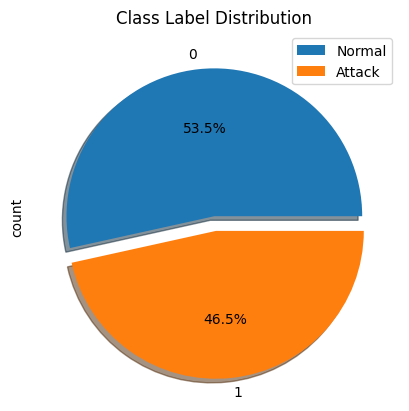

In [81]:
# visualization of class_label in a pie chart with percentages and labels i.e., 0 = normal anbd 1 = attack
# plt.figure(figsize=(10,10))
df['class_label'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0,0.1])
#replace the labels with normal and attack instead of 0 and 1
plt.legend(['Normal','Attack'])
plt.title('Class Label Distribution')
plt.show()


- Normal vs Attack ratio is not balanced but near to equal. Which means that this is not a real traffic data where almost classes are 50-50 and thats what we know from its documentation that it is a simulated dataset.
- In real network dataset the division is not like that i.e., more normal data and very less attack data.

    - 2.2. Attacks division

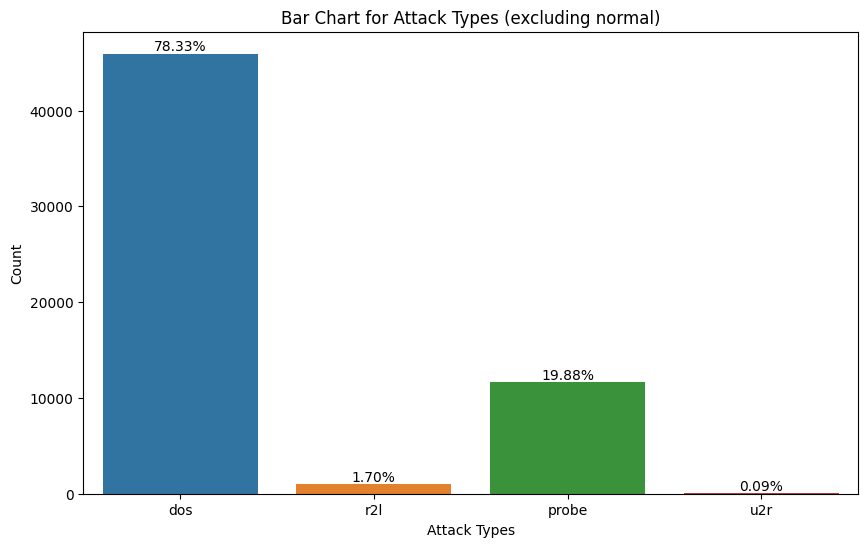

In [82]:
# Create a countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtered, x='attack_class')

# Calculate percentages manually
total = len(df_filtered)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height / total:.2%}', ha='center', va='bottom')

# Customize the chart
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.title('Bar Chart for Attack Types (excluding normal)')

# Show the plot
plt.show()

- A large portion of the attacks are DoS attacks then comes the probe attacks. whereas r2l and u2r are just 1.79% in combined. Thus, if we stop the DoS attacks then we could be abel to solve the major attacks.

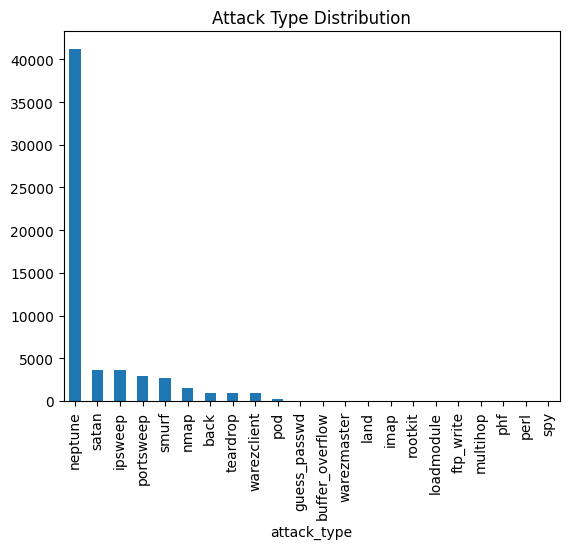

In [83]:
# bar chart of attack type and attack class
#plt.figure(figsize=(10,10))
df_filtered['attack_type'].value_counts().plot.bar()
plt.title('Attack Type Distribution')
plt.show()

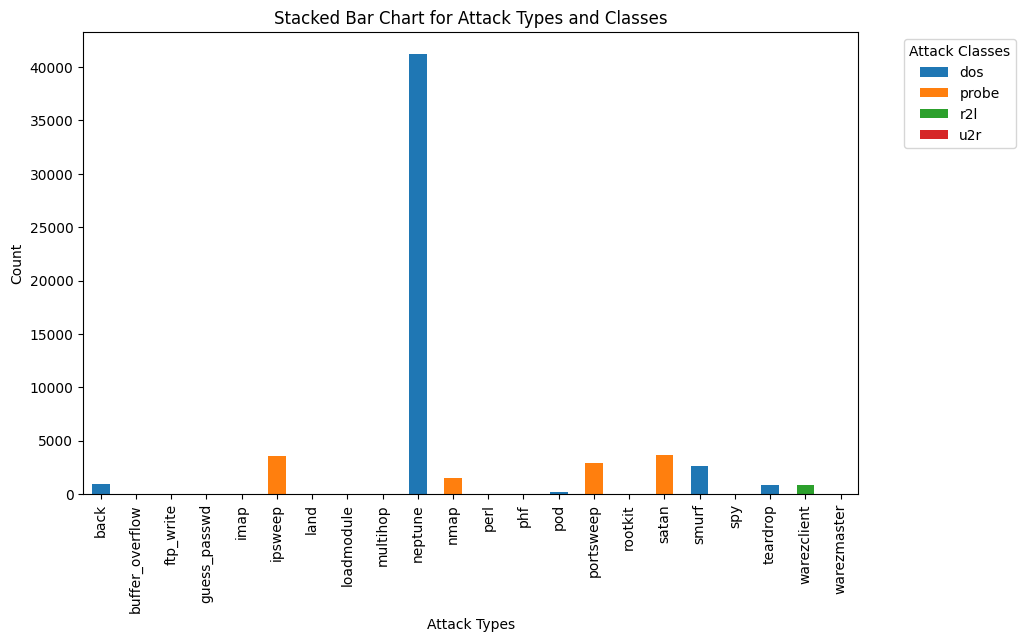

In [84]:
# Create a contingency table (cross-tabulation) between the two categorical variables
contingency_table = pd.crosstab(df_filtered['attack_type'], df_filtered['attack_class'])

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Attack Types and Classes')
plt.legend(title='Attack Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [85]:
# show the percentage of each attack type
df_filtered['attack_type'].value_counts(normalize=True)*100


attack_type
neptune            70.295071
satan               6.196486
ipsweep             6.138496
portsweep           4.999147
smurf               4.513048
nmap                2.546478
back                1.630565
teardrop            1.521405
warezclient         1.517994
pod                 0.342828
guess_passwd        0.090397
buffer_overflow     0.051168
warezmaster         0.034112
land                0.030701
imap                0.018762
rootkit             0.017056
loadmodule          0.015351
ftp_write           0.013645
multihop            0.011939
phf                 0.006822
perl                0.005117
spy                 0.003411
Name: proportion, dtype: float64

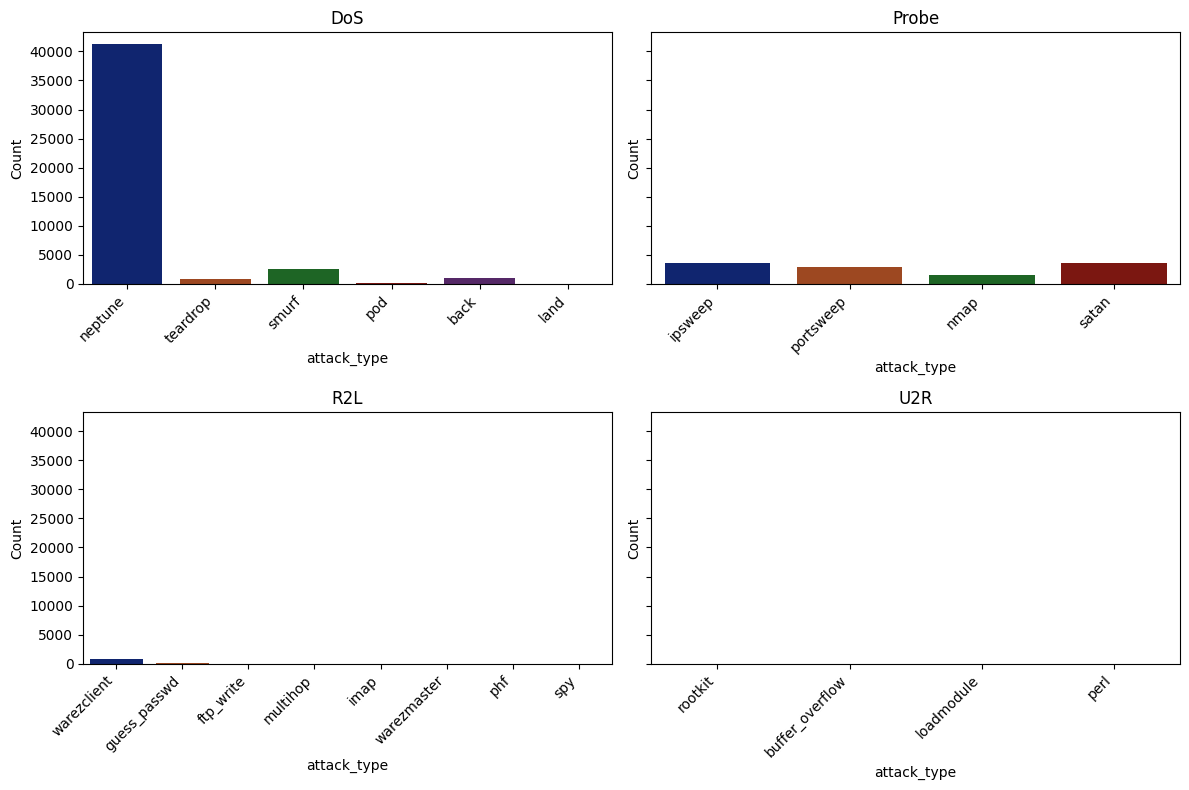

In [86]:
# Create subplots for each attack class
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Plot and format the first subplot
sns.countplot(data=df[df['attack_class'] == 'dos'], x='attack_type', ax=ax[0, 0], palette='dark')
ax[0, 0].set_title('DoS')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot and format the second subplot
sns.countplot(data=df[df['attack_class'] == 'probe'], x='attack_type', ax=ax[0, 1], palette='dark')
ax[0, 1].set_title('Probe')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot and format the third subplot
sns.countplot(data=df[df['attack_class'] == 'r2l'], x='attack_type', ax=ax[1, 0], palette='dark')
ax[1, 0].set_title('R2L')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot and format the fourth subplot
sns.countplot(data=df[df['attack_class'] == 'u2r'], x='attack_type', ax=ax[1, 1], palette='dark')
ax[1, 1].set_title('U2R')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


- From here we can see that around 70% attacks are just the neptune attack (DOS) attack so the top 5 attacks are:
  - 1. Neptune
  - 2. Satan
  - 3. Ipsweep
  - 4. portsweep
  - 5. smurf
  

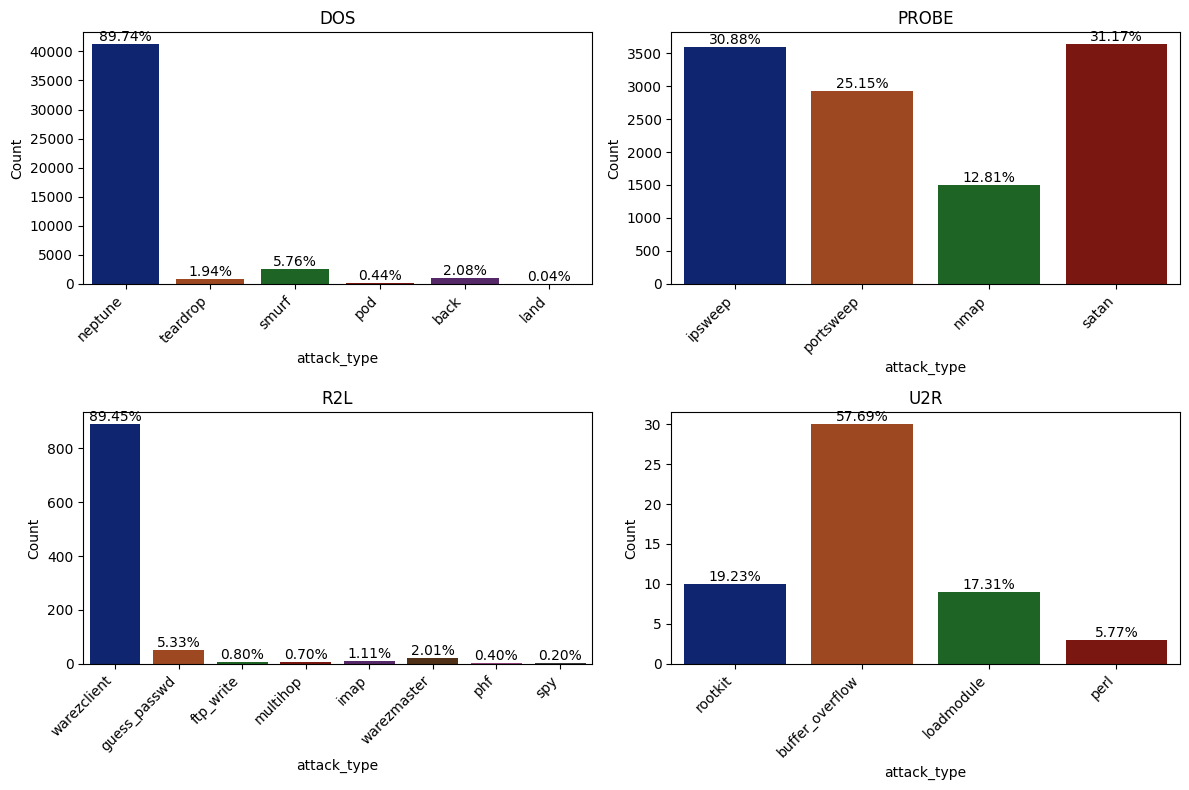

In [87]:


# Create subplots for each attack class
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# List of attack classes
attack_classes = ['dos', 'probe', 'r2l', 'u2r']

for i, attack_class in enumerate(attack_classes):
    # Plot countplot for each attack class
    sns.countplot(data=df[df['attack_class'] == attack_class], x='attack_type', ax=ax[i // 2, i % 2], palette='dark')
    ax[i // 2, i % 2].set_title(attack_class.upper())
    ax[i // 2, i % 2].set_ylabel('Count')
    ax[i // 2, i % 2].set_xticklabels(ax[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

    # Calculate percentages manually
    total = len(df[df['attack_class'] == attack_class])
    for p in ax[i // 2, i % 2].patches:
        height = p.get_height()
        ax[i // 2, i % 2].text(p.get_x() + p.get_width() / 2., height, f'{height / total:.2%}', ha='center', va='bottom')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


- From this we can see that the top category of attack within all of the four attacks:
  - DOS has Neptune
  - Probe has satan
  - R2L has warezclient
  - U2R has buffer_overflow

#### **2.3.1. DURATION**

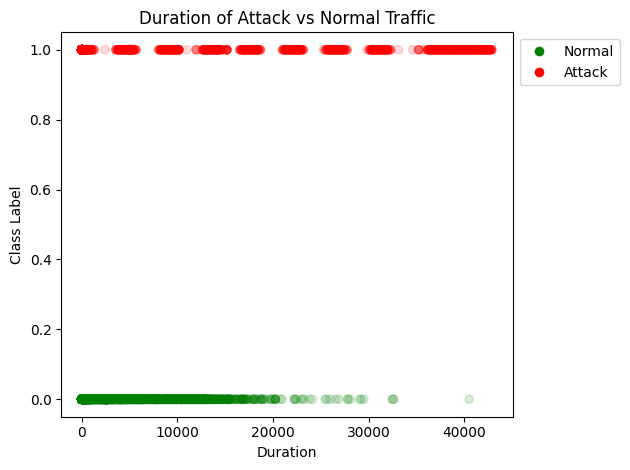

In [88]:
# Scatter plot with colors mapped based on class label
scatter = plt.scatter(df['duration'], df['class_label'],alpha=0.15, c=df['class_label'].map({0: 'green', 1: 'red'}))

plt.xlabel('Duration')
plt.ylabel('Class Label')
plt.title('Duration of Attack vs Normal Traffic')

# Create a legend specifying the colors for attack and normal, placed outside the plot
legend_labels = {0: 'Normal', 1: 'Attack'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8)
                   for label, color in [('Normal', 'green'), ('Attack', 'red')]]
plt.legend(handles=legend_elements, labels=legend_labels.values(), loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Ensures the legend doesn't overlap with the plot
plt.show()


- Here we can see that normal traffic is continious and large from 0 to 20000 and after that the traffic is not continious and not high. Only 1 value is at 40000 duration
- Whereas, the abnormal traffic is not cotinious at each level and also most of the abnormal traffic is between 30000 and 40000 ( where no nomral traffic usually falls)

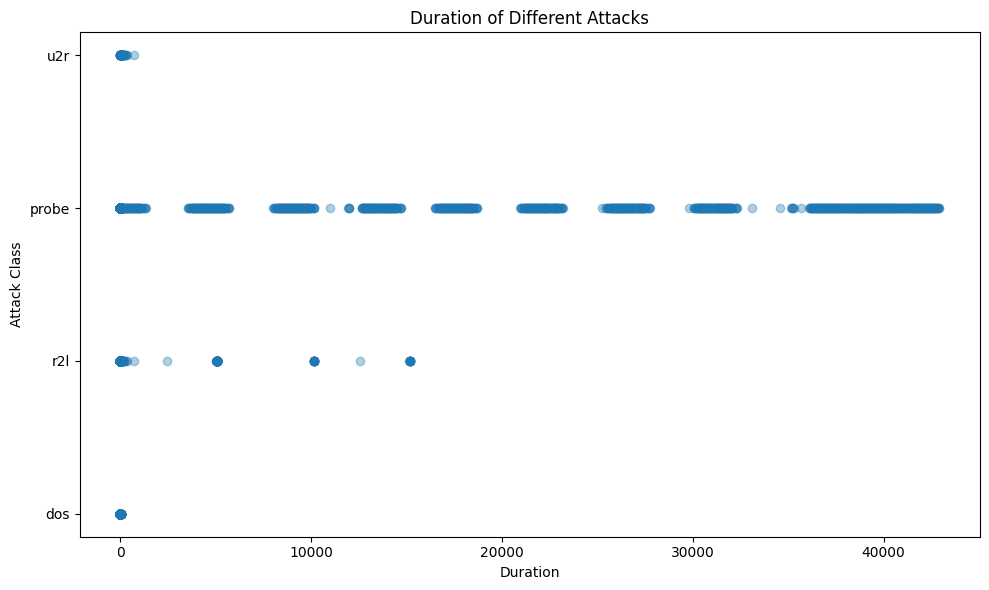

In [89]:
plt.figure(figsize=(10, 6))

# Scatter plot with colors mapped based on attack_class
scatter = plt.scatter(df_filtered['duration'], df_filtered['attack_class'], alpha=0.35, 
                      cmap='viridis')

plt.xlabel('Duration')
plt.ylabel('Attack Class')
plt.title('Duration of Different Attacks')

# # Add a colorbar to show the mapping of colors to attack classes
# cbar = plt.colorbar(scatter)
# cbar.set_label('Attack Class')

plt.tight_layout()
plt.show()


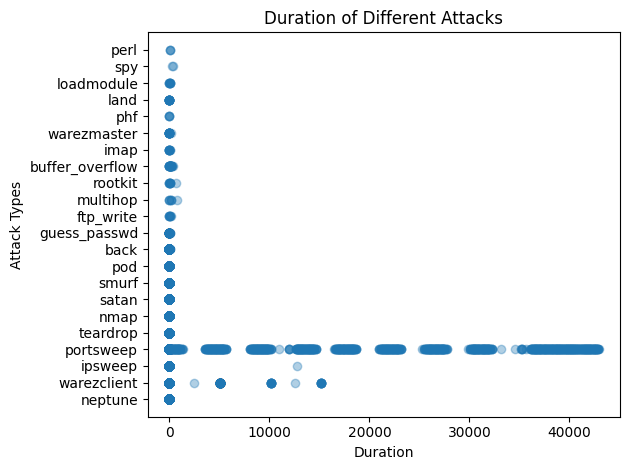

In [90]:
# Scatter plot with colors mapped based on attack_label
scatter = plt.scatter(df_filtered['duration'], df_filtered['attack_type'], alpha=0.35, 
                      cmap='viridis')

plt.xlabel('Duration')
plt.ylabel('Attack Types')
plt.title('Duration of Different Attacks')

# # Add a colorbar to show the mapping of colors to attack classes
# cbar = plt.colorbar(scatter)
# cbar.set_label('Attack Class')

plt.tight_layout()
plt.show()


#### **2.3.2. PROTOCOL TYPE**

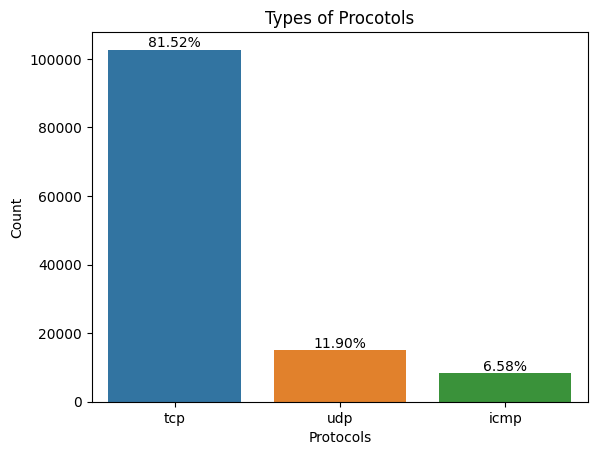

In [91]:
# Create a count plot for 'protocol type'
ax = sns.countplot(x='protocol_type', data=df)
plt.xlabel('Protocols')
plt.ylabel('Count')
plt.title('Types of Procotols')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Calculate percentages manually and annotate the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()


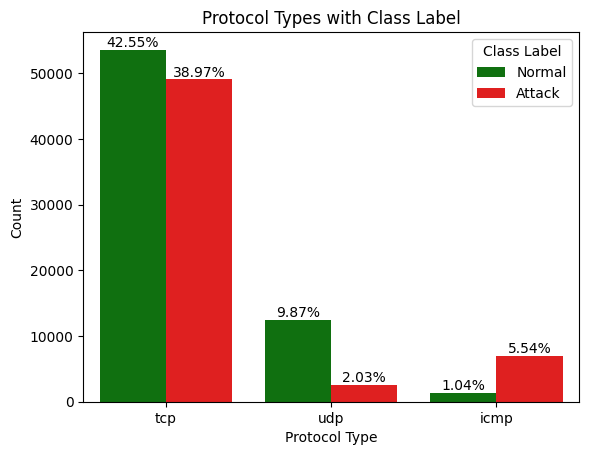

In [92]:
# Create a count plot for 'protocol type' with different colors for class labels
ax = sns.countplot(x='protocol_type', hue='class_label', data=df, palette={0: 'green', 1: 'red'})
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Types with Class Label')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend(title='Class Label', labels=['Normal', 'Attack'])  # Add legend for class labels

# Calculate percentages manually and annotate the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()


- From here we can see that TCP is the most frequently used protocal followed by UDP but also TCP has the highest rate for abnormal traffic.
- However, we look closely then only ICMP has the highest ratio of the ATTACK as compared to the Normal traffic. In both TCP and UDP there are attacks but the ratio is less than the normal ones.

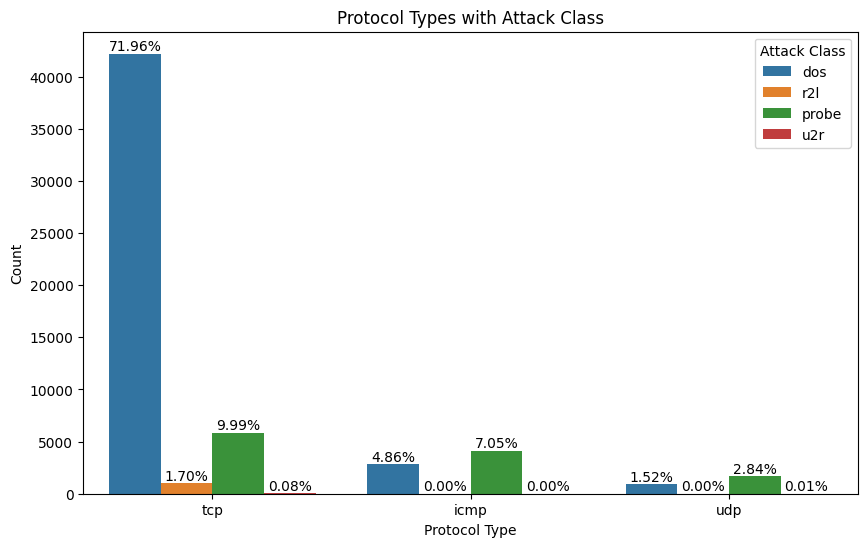

In [93]:


plt.figure(figsize=(10, 6))

# Create a count plot for 'protocol type' with different colors for attack classes
ax = sns.countplot(x='protocol_type', hue='attack_class', data=df_filtered)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Types with Attack Class')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.legend(title='Attack Class', labels=df_filtered['attack_class'].unique())  # Add legend for attack classes

# Calculate percentages manually and annotate the bars
total = float(len(df_filtered))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()


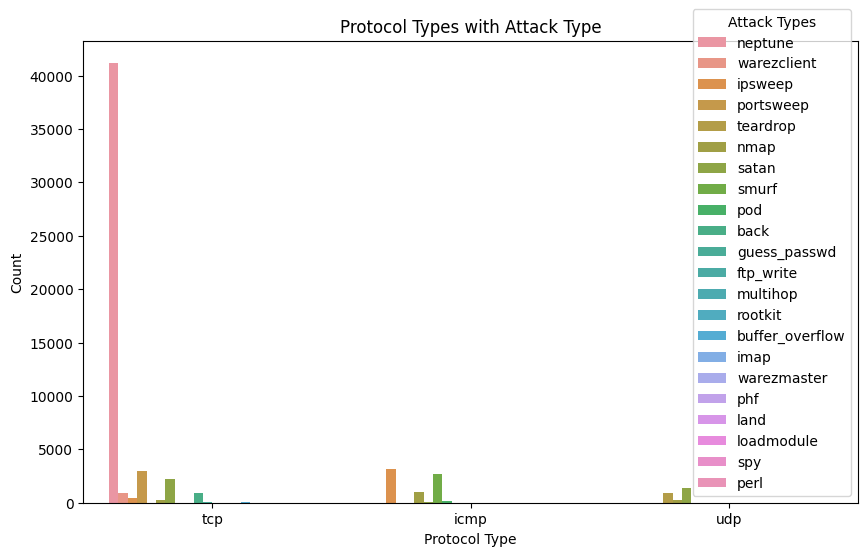

In [94]:


plt.figure(figsize=(10, 6))

# Create a count plot for 'protocol type' with different colors for attack classes
ax = sns.countplot(x='protocol_type', hue='attack_type', data=df_filtered)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Types with Attack Type')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.legend(title='Attack Types', labels=df_filtered['attack_type'].unique())  # Add legend for attack classes

# # Calculate percentages manually and annotate the bars
# total = float(len(df_filtered))
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()


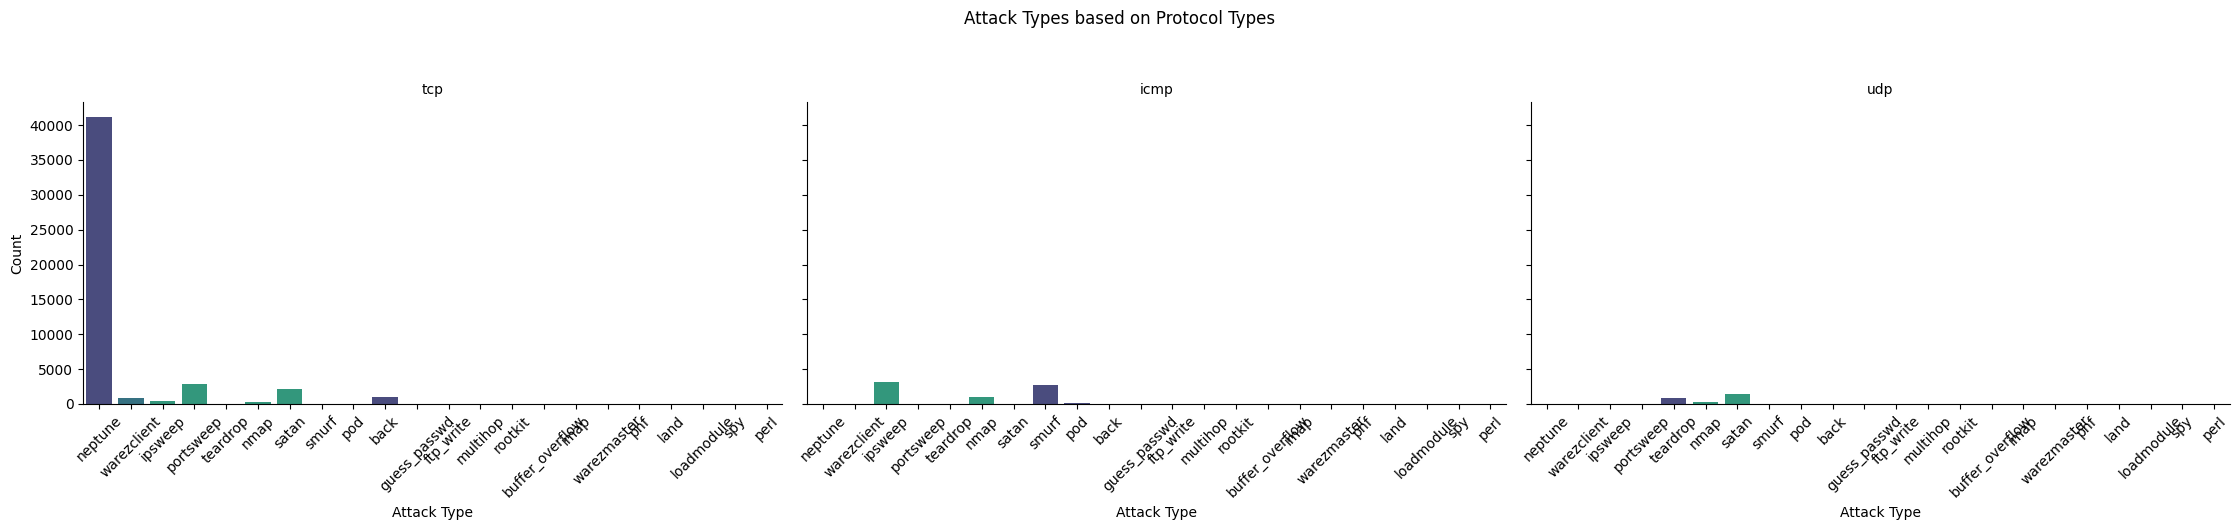

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered DataFrames based on protocol types
tcp_data = df_filtered[df_filtered['protocol_type'] == 'tcp']
udp_data = df_filtered[df_filtered['protocol_type'] == 'udp']
icmp_data = df_filtered[df_filtered['protocol_type'] == 'icmp']

# Create a FacetGrid with specified size
g = sns.FacetGrid(df_filtered, col='protocol_type', hue='attack_class', palette='viridis', height=5, aspect=1.5)
g.map(sns.countplot, 'attack_type', order=df_filtered['attack_type'].unique()).set_titles('{col_name}')

# Set labels and titles
g.set_axis_labels('Attack Type', 'Count')
g.fig.suptitle('Attack Types based on Protocol Types', y=1.05)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()


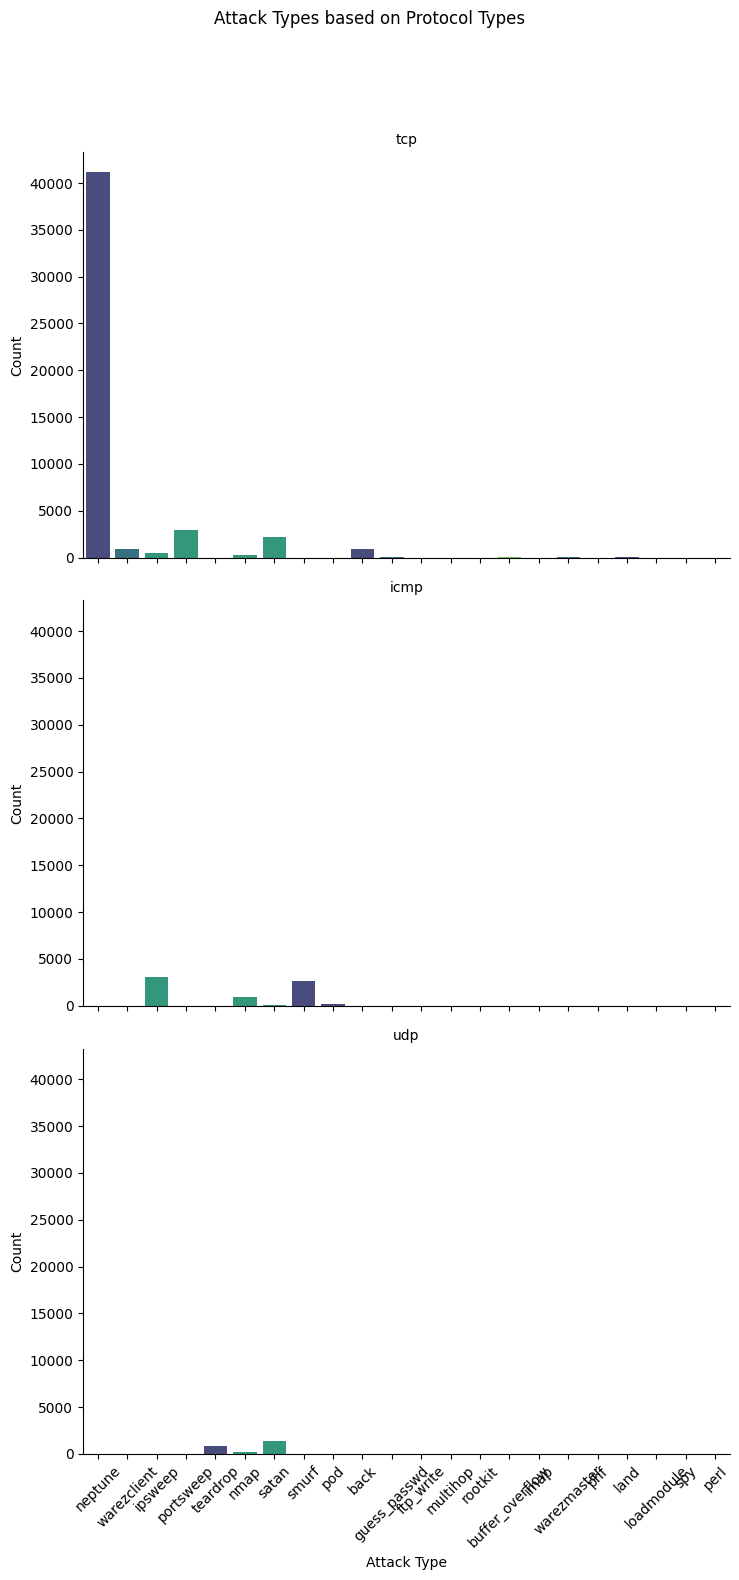

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtered DataFrames based on protocol types
tcp_data = df_filtered[df_filtered['protocol_type'] == 'tcp']
udp_data = df_filtered[df_filtered['protocol_type'] == 'udp']
icmp_data = df_filtered[df_filtered['protocol_type'] == 'icmp']

# Create a FacetGrid with specified size and vertical stacking
g = sns.FacetGrid(df_filtered, row='protocol_type', hue='attack_class', palette='viridis', height=5, aspect=1.5)
g.map(sns.countplot, 'attack_type', order=df_filtered['attack_type'].unique()).set_titles('{row_name}')

# Set labels and titles
g.set_axis_labels('Attack Type', 'Count')
g.fig.suptitle('Attack Types based on Protocol Types', y=1.05)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()


#### **2.3.3. SERVICES**

In [97]:
#df.service.value_counts().count()
unique_service = df['service'].value_counts()
print("Number of unique service : ",unique_service.shape[0])
print(unique_service.head())

Number of unique service :  70
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


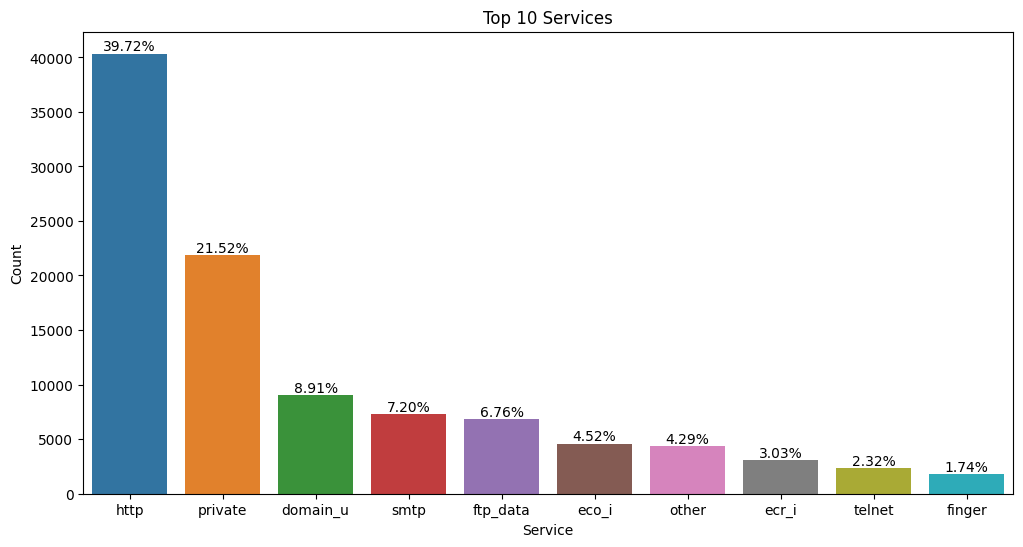

In [98]:
plt.figure(figsize=(12, 6))
top_services = df['service'].value_counts().head(10)  # Consider top 10 services for illustration
ax = sns.barplot(y=top_services.values, x=top_services.index)
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Top 10 Services')

# Calculate percentages manually and annotate the bars
total = top_services.sum()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()


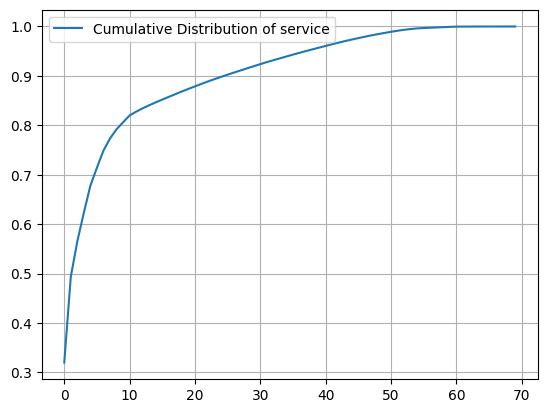

In [99]:
s = sum(unique_service.values)
h = unique_service.values/s
c = np.cumsum(h)
plt.plot(c , label = "Cumulative Distribution of service")
plt.grid()
plt.legend()
plt.show()

this is a skewed distribution
there are few services occur more and major of service occur less time .
In this distribution from left to right services in a decreasing order (frequency).
0th index contain the http, 1st index contain private etc.

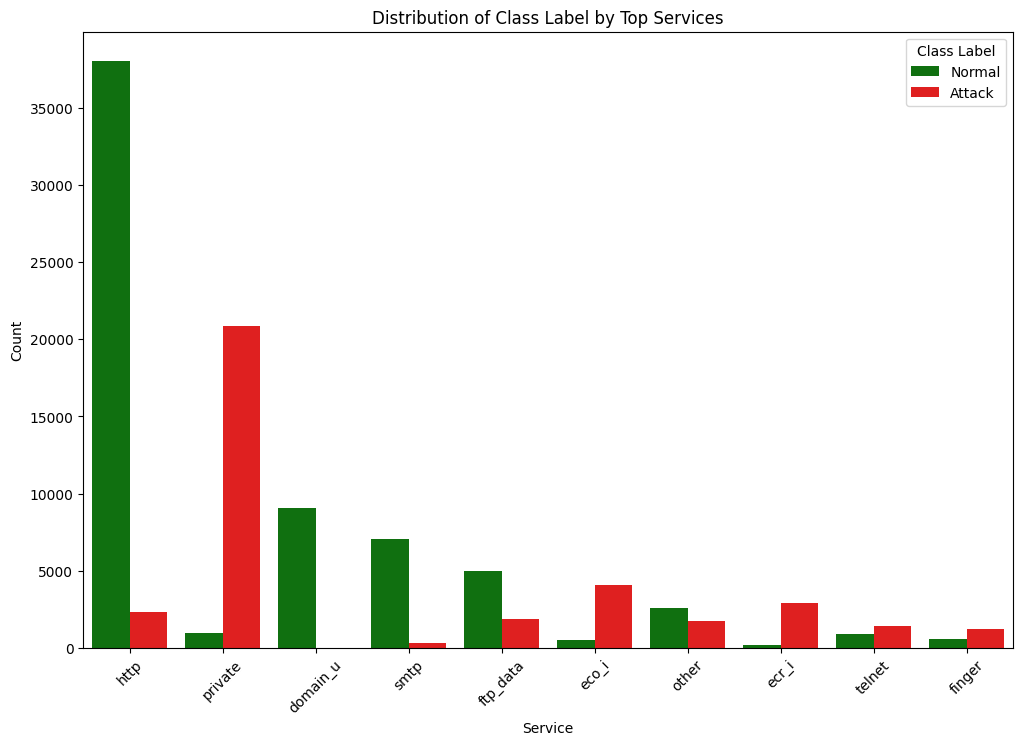

In [100]:
# Filter the DataFrame to consider top services
top_services = df['service'].value_counts().head(10)  # Consider top 10 services for illustration
top_services_list = top_services.index.tolist()
df_top_services = df[df['service'].isin(top_services_list)]

plt.figure(figsize=(12, 8))

# Create a count plot for 'service' with hue as 'class_label' and sort by count
sns.countplot(x='service', hue='class_label', data=df_top_services,
              palette={0: 'green', 1: 'red'},
              order=df_top_services['service'].value_counts().index)  # Sort by count

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Class Label by Top Services')
plt.xticks(rotation=45)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])

plt.show()


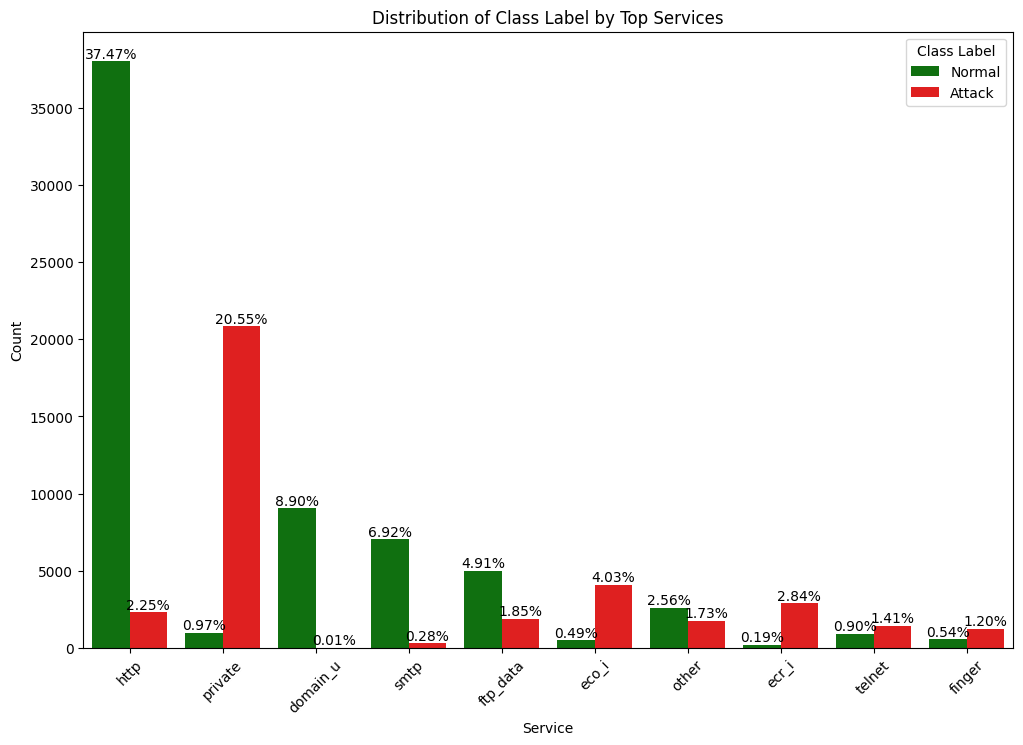

In [101]:
# Filter the DataFrame to consider top services
top_services = df['service'].value_counts().head(10)  # Consider top 10 services for illustration
top_services_list = top_services.index.tolist()
df_top_services = df[df['service'].isin(top_services_list)]

plt.figure(figsize=(12, 8))

# Create a count plot for 'service' with hue as 'class_label' and sort by count
ax = sns.countplot(x='service', hue='class_label', data=df_top_services,
                   palette={0: 'green', 1: 'red'},
                   order=df_top_services['service'].value_counts().index)  # Sort by count

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Class Label by Top Services')
plt.xticks(rotation=45)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])

# Calculate percentages manually and annotate the bars
total = len(df_top_services)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height/total)*100:.2f}%', ha='center', va='bottom')

plt.show()


#### **2.3.4. FLAG**

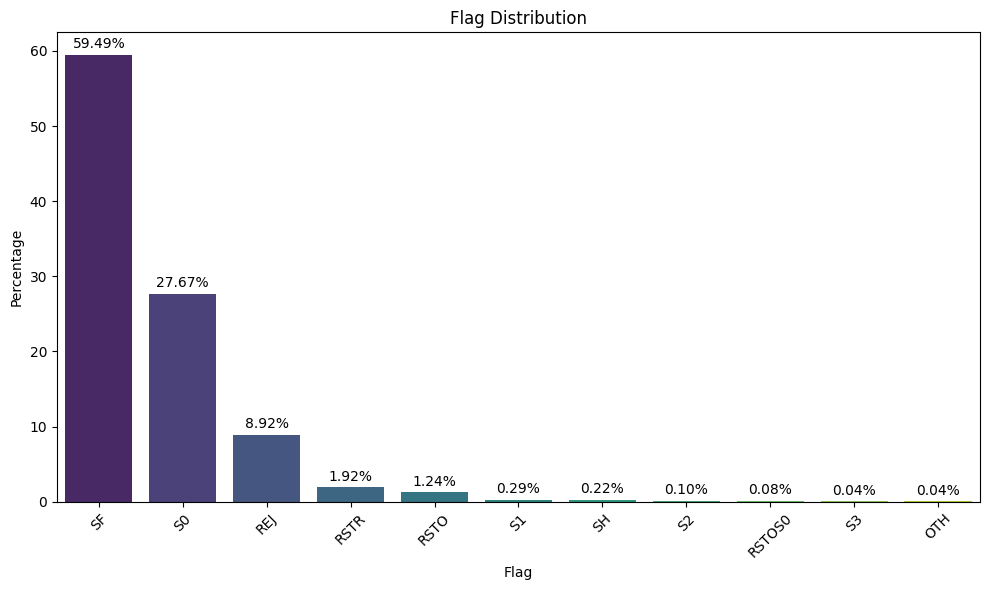

In [102]:
# Calculate flag counts and percentages
flag_counts = df['flag'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

# Create a bar plot for flag distribution
ax = sns.barplot(x=flag_counts.index, y=flag_counts.values, palette='viridis')
plt.xlabel('Flag')
plt.ylabel('Percentage')
plt.title('Flag Distribution')

# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}%', ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


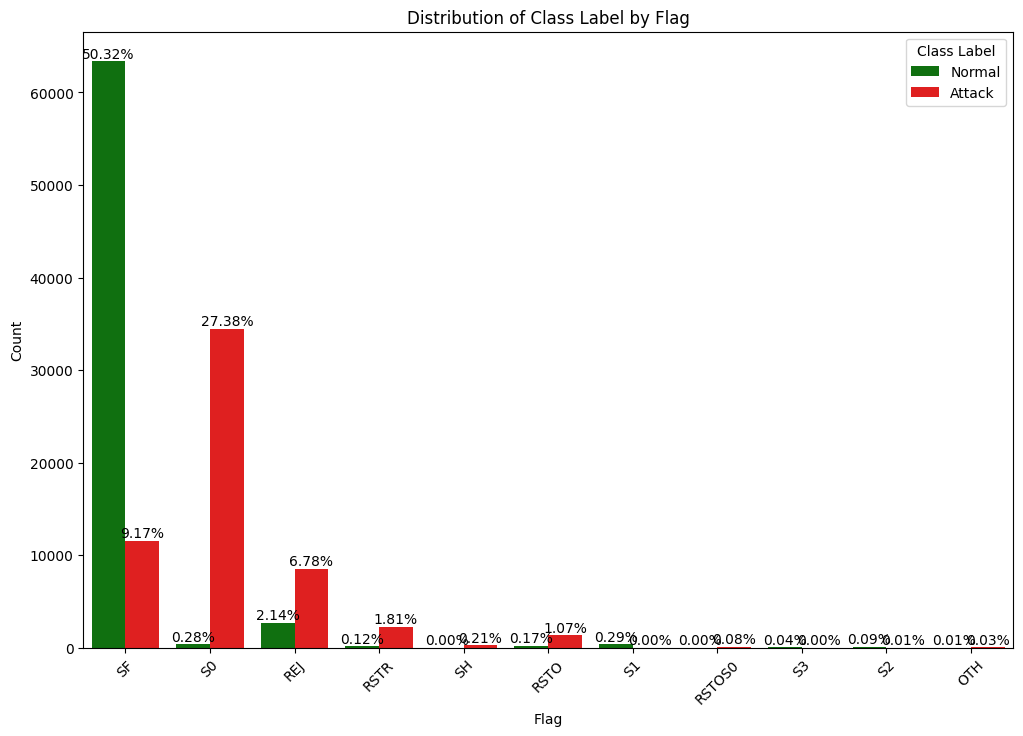

In [103]:
plt.figure(figsize=(12, 8))

# Create a count plot for 'flag' with hue as 'class_label'
ax = sns.countplot(x='flag', hue='class_label', data=df, palette={0: 'green', 1: 'red'})
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Distribution of Class Label by Flag')

plt.xticks(rotation=45)
plt.legend(title='Class Label', labels=['Normal', 'Attack'])

# Calculate total counts for annotation
total_counts = len(df)

# Annotate each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{(height / total_counts) * 100:.2f}%', 
            ha='center', va='bottom')

plt.show()


#### **2.3.5. Src_bytes**

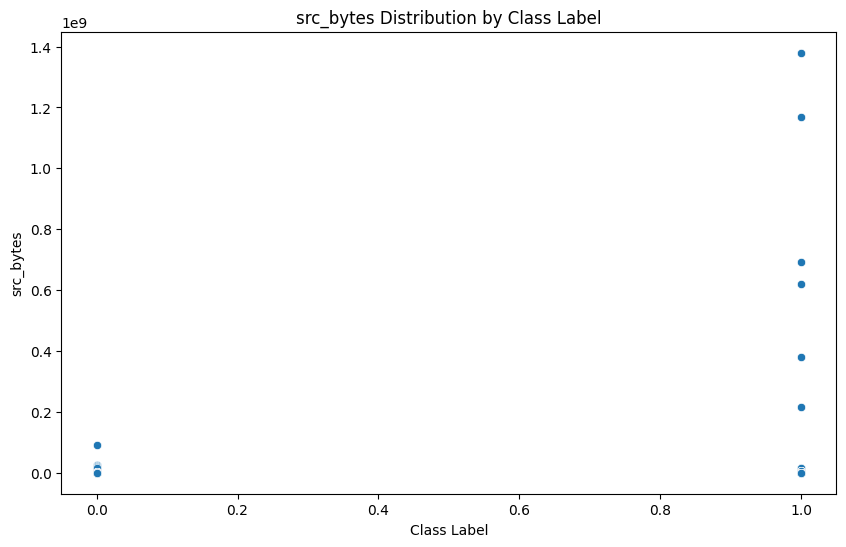

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='class_label', y='src_bytes', data=df, palette={0: 'green', 1: 'red'})
plt.xlabel('Class Label')
plt.ylabel('src_bytes')
plt.title('src_bytes Distribution by Class Label')
plt.show()


### MULTIVARIATE ANALYSIS

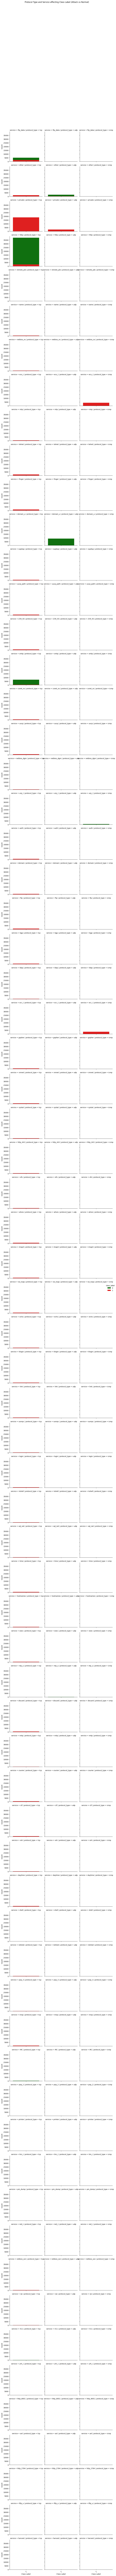

In [105]:
# Create a FacetGrid to plot the relationship between protocol_type, service, and class_label
g = sns.FacetGrid(df, col='protocol_type', row='service', hue='class_label', palette={0: 'green', 1: 'red'})
g.map(sns.countplot, 'class_label').add_legend()

# Set labels and titles
g.set_axis_labels('Class Label', 'Count')
g.fig.suptitle('Protocol Type and Service affecting Class Label (Attack vs Normal)', y=1.05)

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()


In [106]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack_class,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0


    - Now instead of going into each variable we can find the best features but this data set has numerical, categorical and binary column so we need two different datasets:
              - 1. Numerical values + Binary Values
              - 2. Categorical

In [107]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)


- Numerical Varaibles:
  - Correlation coefficient wrt class label
  - Feature Importance from Model
    - Tree based (Random Forest + Gradient Boosting)
  - univaraite feature selection
    - selectKBest in scikit-learn
    - ANOVA-Fvalue
  

In [108]:
# find the correlation coefficient between the numerical variables with class label and make it absolute
corr = abs(df_numerical.corr()['class_label']).sort_values(ascending=False)
#print(corr)

#pick only correlation values greater than 0.5
corr = corr[corr > 0.5]
print(corr)

class_label                 1.000000
same_srv_rate               0.751913
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
count                       0.576444
Name: class_label, dtype: float64


['class_label', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'count']


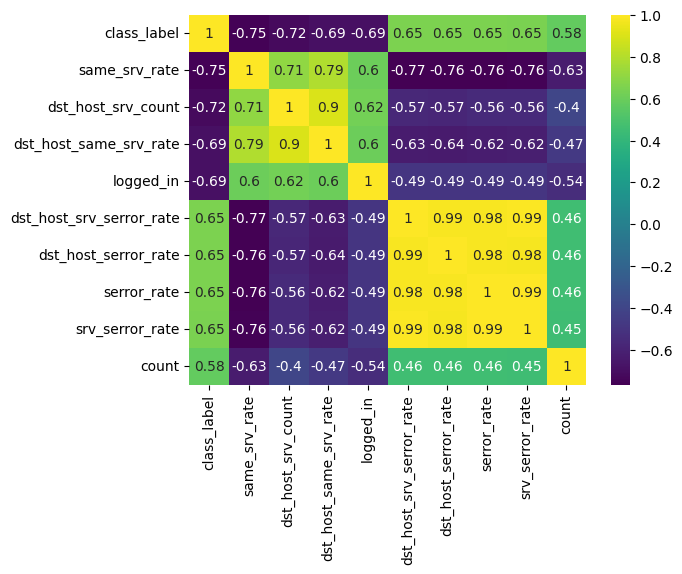

In [109]:
#now save the above correlation values in a list and check for direct and inverse relation between the variables wrt class label
corr_list = corr.index.tolist()
print(corr_list)

#now plot the correlation matrix
#plt.figure(figsize=(15,15))
sns.heatmap(df_numerical[corr_list].corr(), annot=True, cmap='viridis')
plt.show()

In [110]:
#do one hot encoding for the categorical variables and check its correlation with class label
df_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_categorical.head()


,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_buffer_overflow,attack_type_ftp_write,attack_type_guess_passwd,attack_type_imap,attack_type_ipsweep,attack_type_land,attack_type_loadmodule,attack_type_multihop,attack_type_neptune,attack_type_nmap,attack_type_normal,attack_type_perl,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster,attack_class_normal,attack_class_probe,attack_class_r2l,attack_class_u2r
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [111]:

#now concatenate the numerical and categorical variables
df_new = pd.concat([df_numerical, df_categorical], axis=1)
df_new.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_type_buffer_overflow,attack_type_ftp_write,attack_type_guess_passwd,attack_type_imap,attack_type_ipsweep,attack_type_land,attack_type_loadmodule,attack_type_multihop,attack_type_neptune,attack_type_nmap,attack_type_normal,attack_type_perl,attack_type_phf,attack_type_pod,attack_type_portsweep,attack_type_rootkit,attack_type_satan,attack_type_smurf,attack_type_spy,attack_type_teardrop,attack_type_warezclient,attack_type_warezmaster,attack_class_normal,attack_class_probe,attack_class_r2l,attack_class_u2r
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [112]:

#now find the correlation between the new dataframe and class label
corr = abs(df_new.corr()['class_label']).sort_values(ascending=False)
corr = corr[corr > 0.5]
# corr_list = corr.index.tolist()
# print(corr_list)
corr


attack_class_normal         1.000000
attack_type_normal          1.000000
class_label                 1.000000
flag_SF                     0.756286
same_srv_rate               0.751913
attack_type_neptune         0.747336
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
flag_S0                     0.650206
srv_serror_rate             0.648289
count                       0.576444
service_http                0.562312
Name: class_label, dtype: float64

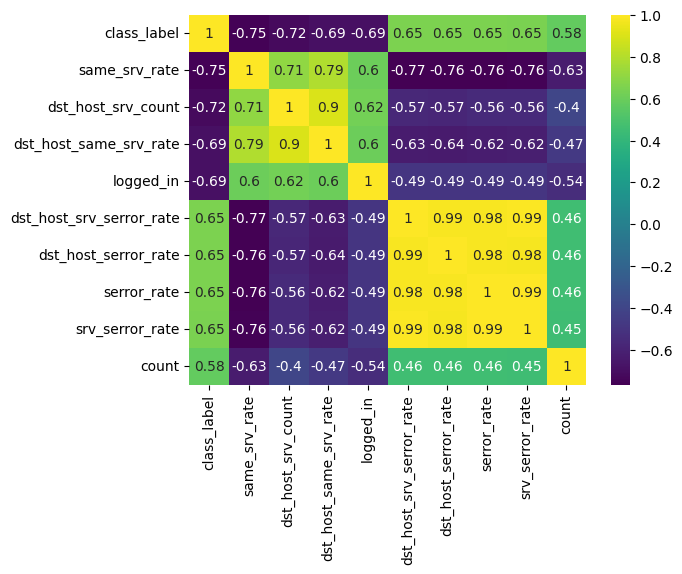

In [113]:

#now plot the correlation matrix
#plt.figure(figsize=(15,15))
sns.heatmap(df_new[corr_list].corr(), annot=True, cmap='viridis')
plt.show()


# NORMALIZE the data to see if the values still the same

In [114]:
df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)


#label encoding for the categorical variables in df data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_e_categorical = df_categorical.apply(le.fit_transform)
#df_e_categorical.head()

#normalize the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_n_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


#concat the encoded and normalized datasets
df_ne = pd.concat([df_n_numerical, df_e_categorical], axis=1)
#df_ne.head()

#drop attack_class and attack_type columns
df_ne.drop(['attack_class', 'attack_type'], axis=1, inplace=True)
df_ne.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type,service,flag
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,1,20,9
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,2,44,9
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,1.0,1,49,5
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.000000,0.0,1,24,9
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000,0.0,1,24,9


In [115]:
#correlation matrix wrt class label and absolute values greater than 0.5 only
corr = abs(df_ne.corr()['class_label']).sort_values(ascending=False)
corr = corr[corr > 0.5]
corr

class_label                 1.000000
same_srv_rate               0.751913
dst_host_srv_count          0.722535
dst_host_same_srv_rate      0.693803
logged_in                   0.690171
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
flag                        0.647073
count                       0.576444
Name: class_label, dtype: float64

(88181, 41) (37792, 41) (88181,) (37792,)
16
Index(['logged_in', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level', 'protocol_type', 'service',
       'flag'],
      dtype='object')


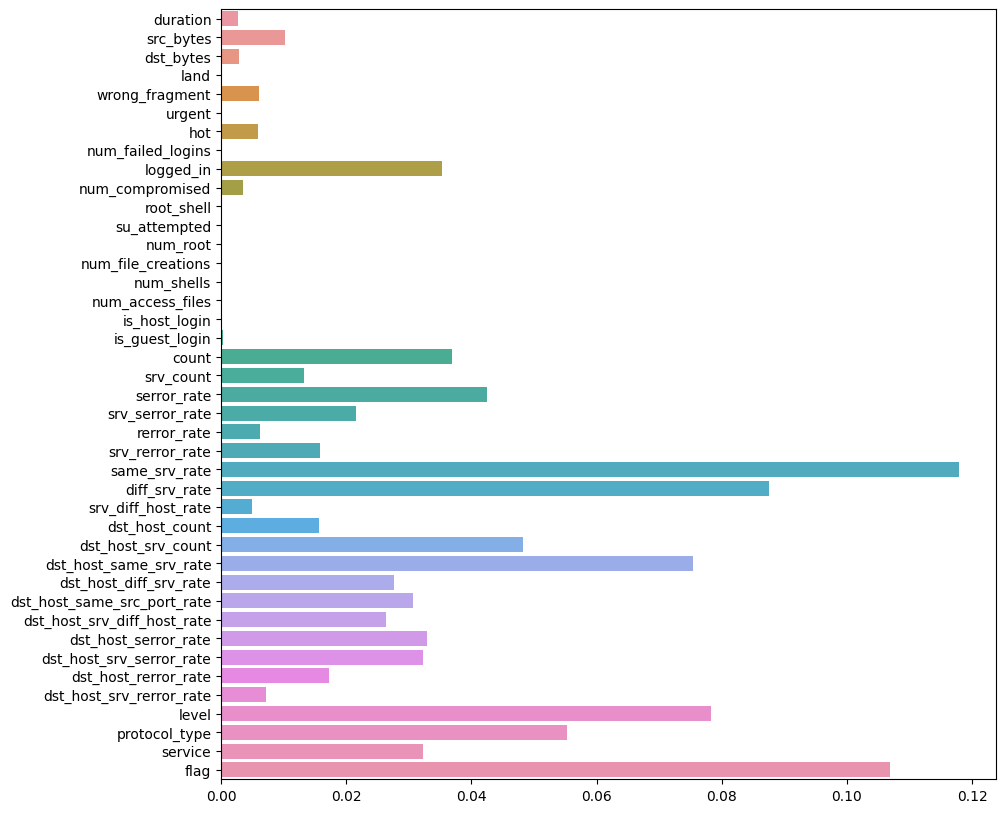

In [116]:
#perfrom random forest feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_ne.drop(['class_label'], axis=1)
y = df_ne['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#select the features
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

#plot all the selected features
plt.figure(figsize=(10,10))
sns.barplot(x=sel.estimator_.feature_importances_, y=X_train.columns)
plt.show()





(88181, 41) (37792, 41) (88181,) (37792,)
5
Index(['same_srv_rate', 'dst_host_same_srv_rate', 'level', 'protocol_type',
       'flag'],
      dtype='object')


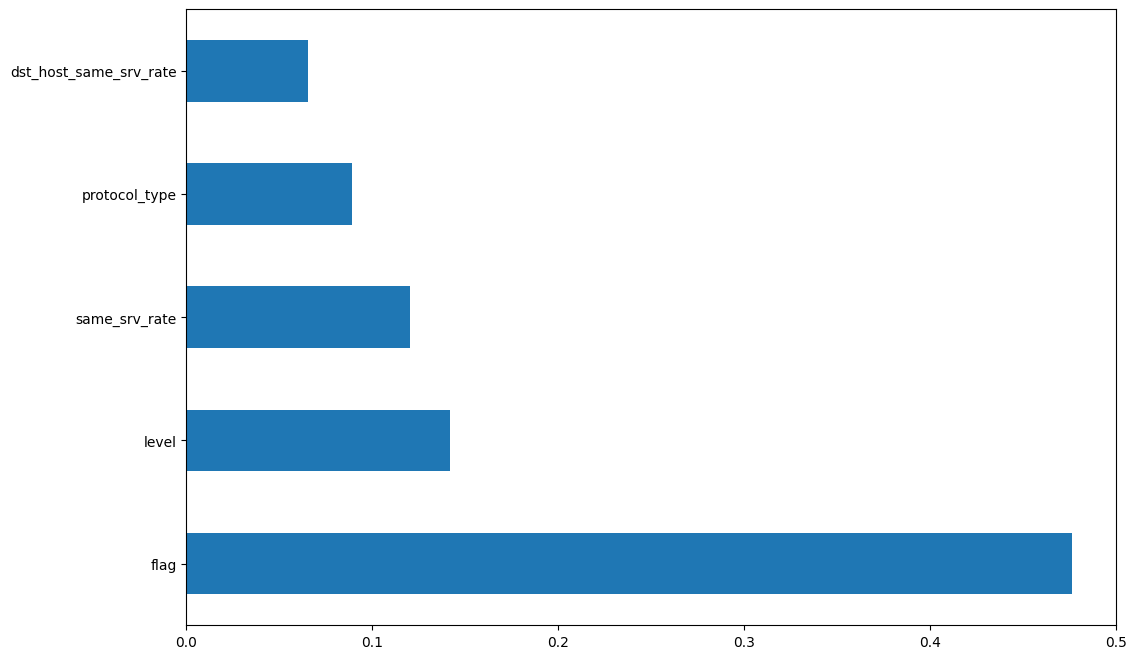

In [117]:
#best features by gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_ne.drop(['class_label'], axis=1)
y = df_ne['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#fit the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

#select the features
sel = SelectFromModel(gb)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

#plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

### Hot encoding categorical variables and then concat numerical and categorical and then normalize them and then do feature selction

In [118]:
#drop attack_class and attack_type columns
df.drop(['attack_class', 'attack_type'], axis=1, inplace=True)


In [119]:

df_numerical = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

In [120]:
#one hot encoding of the categorical variables
df_he_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_he_categorical.head()

#normalize the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_n_numerical = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

#concat the encoded and normalized datasets
df_he_n = pd.concat([df_n_numerical, df_he_categorical], axis=1)
df_he_n.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,class_label,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.952381,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.714286,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.904762,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00

In [121]:
#feature selection using random forest, gradient boosting and xgbosst
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

X = df_he_n.drop(['class_label'], axis=1)
y = df_he_n['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#select the features
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
rf_len = len(selected_feat)
print(rf_len)
print(selected_feat)

#plot only the selected features in a tight layout
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.tight_layout()




(88181, 119) (37792, 119) (88181,) (37792,)
29
Index(['src_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'protocol_type_tcp',
       'protocol_type_udp', 'service_domain_u', 'service_eco_i',
       'service_ecr_i', 'service_http', 'service_private', 'flag_S0',
       'flag_SF'],
      dtype='object')


ValueError: Length of values (41) does not match length of index (119)

<Figure size 1200x800 with 0 Axes>

11
Index(['logged_in', 'count', 'same_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'level',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'flag_SF'],
      dtype='object')


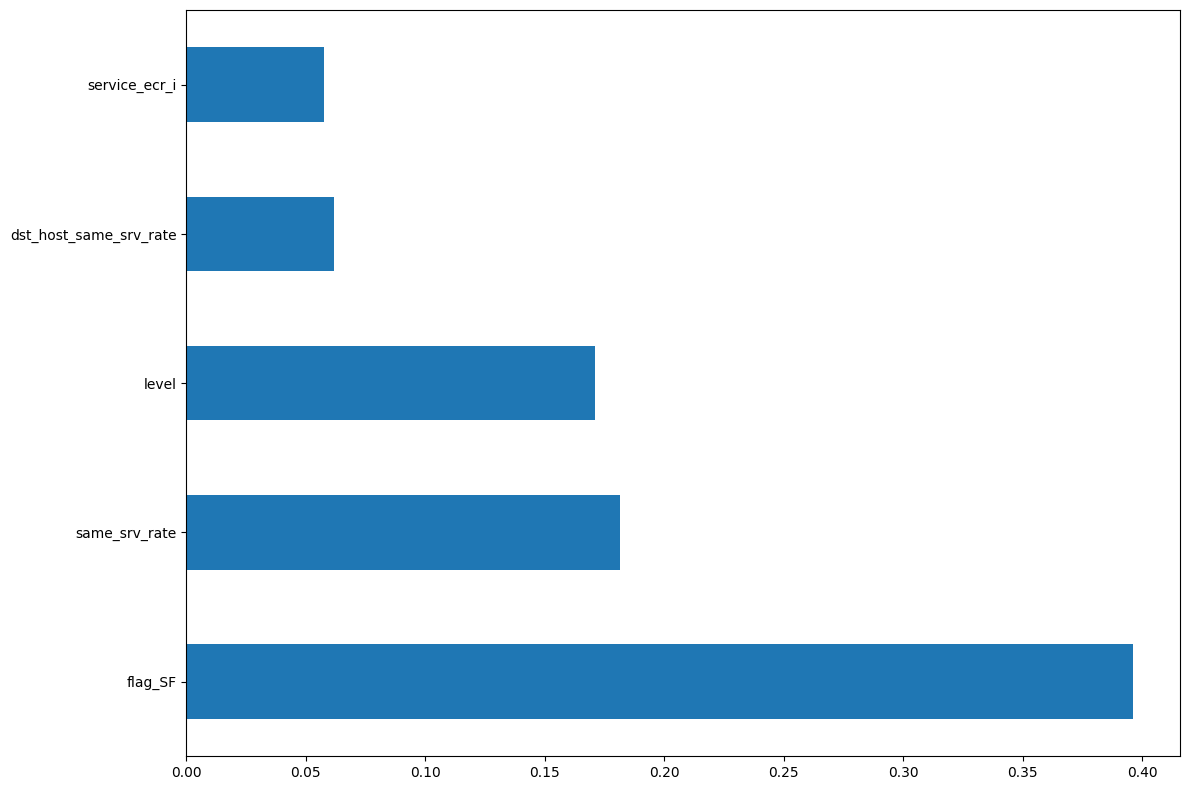

In [ ]:
#fit the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

#select the features
sel = SelectFromModel(gb)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

#plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.tight_layout()

14
Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'diff_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'level', 'service_domain_u', 'service_ecr_i',
       'service_http', 'service_smtp', 'flag_S1'],
      dtype='object')


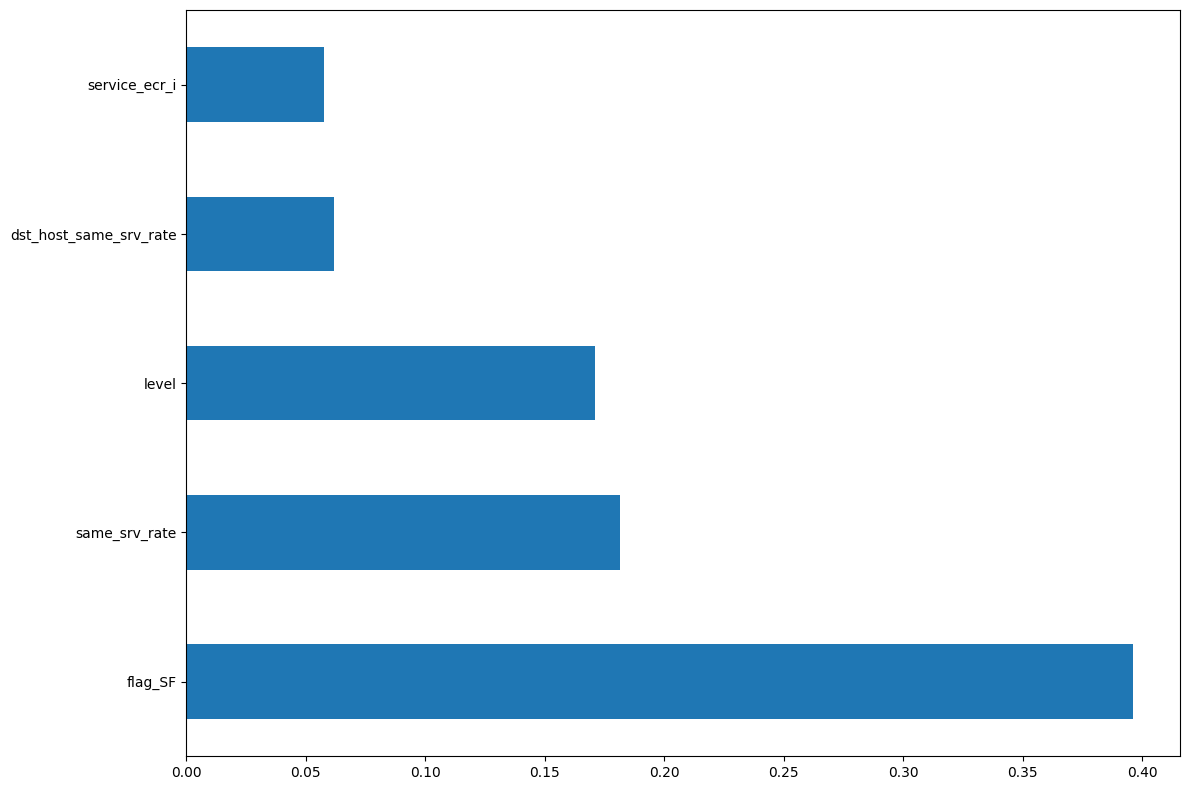

In [ ]:
#fit the model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

#select the features
sel = SelectFromModel(xgb)
sel.fit(X_train, y_train)

#make a list of the selected features
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

#plot the feature importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh')
plt.tight_layout()
plt.show()



### After taking a look at all of these three appraches we finalized the overlapped features:
logged_in
count
dst_host_same_srv_rate
dst_host_same_src_port_rate
dst_host_serror_rate
level
service
flag

In [122]:
# make a dataframe of logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service,flag
df_sel_feat = df_copy[['logged_in','count','dst_host_same_srv_rate',
                  'dst_host_same_src_port_rate','dst_host_serror_rate',
                  'level','service','flag','class_label','attack_class','attack_type']]
#to csv
df_sel_feat.to_csv('NSL_KDD_sel_feat.csv', index=False)
df_sel_feat.head()


,logged_in,count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,level,service,flag,class_label,attack_class,attack_type
0,0,2,0.17,0.17,0.00,20,ftp_data,SF,0,normal,normal
1,0,13,0.00,0.88,0.00,15,other,SF,0,normal,normal
2,0,123,0.10,0.00,1.00,19,private,S0,1,dos,neptune
3,1,5,1.00,0.03,0.03,21,http,SF,0,normal,normal
4,1,30,1.00,0.00,0.00,21,http,SF,0,normal,normal
